In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# RNN by Tensorflow

### 데이터 준비

In [2]:
VOCAB_SIZE = 300
SEQ_LEN = 100

In [3]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=VOCAB_SIZE)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_input, test_input = train_input[:10000], test_input[:5000]
train_target, test_target = train_target[:10000], test_target[:5000]

train_input.shape, train_target.shape, test_input.shape, test_target.shape

((10000,), (10000,), (5000,), (5000,))

In [5]:
# padding 처리 (동일한 길이)
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=SEQ_LEN)
test_seq = pad_sequences(test_input, maxlen=SEQ_LEN)

train_seq.shape, test_seq.shape

((10000, 100), (5000, 100))

In [6]:
# one-hot encoding
from tensorflow.keras.utils import to_categorical

train_onehot = to_categorical(train_seq)
test_onehot = to_categorical(test_seq)

train_onehot.shape, test_onehot.shape

((10000, 100, 300), (5000, 100, 300))

### 모델 준비 및 학습

In [7]:
from tensorflow.keras import models, layers, callbacks, optimizers

input = layers.Input(shape=(SEQ_LEN, VOCAB_SIZE))
x = layers.SimpleRNN(units=8)(input)
output = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(input, output)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100, 300)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 8)                   │           2,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.5021 - loss: 0.6971 - val_accuracy: 0.5370 - val_loss: 0.6895 - learning_rate: 0.0010
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5405 - loss: 0.6884 - val_accuracy: 0.5425 - val_loss: 0.6881 - learning_rate: 0.0010
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5529 - loss: 0.6840 - val_accuracy: 0.5320 - val_loss: 0.6872 - learning_rate: 0.0010
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5887 - loss: 0.6745 - val_accuracy: 0.5405 - val_loss: 0.6875 - learning_rate: 0.0010
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6052 - loss: 0.6671 - val_accuracy: 0.5415 - val_loss: 0.6884 - learning_rate: 0.0010
Epoch 6/100
121/124 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6034 - loss: 0.6598
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6035 - los

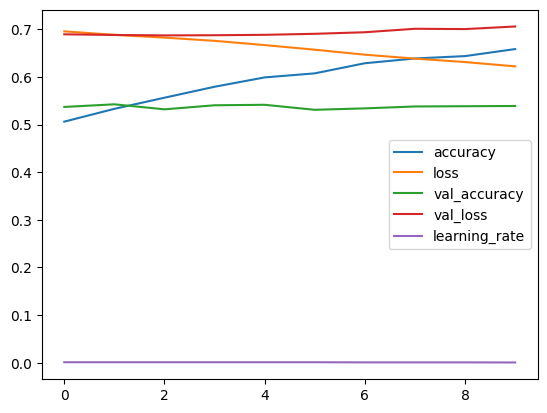

In [8]:
# 컴파일 및 학습
import pandas as pd
import matplotlib.pyplot as plt

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_cb = callbacks.EarlyStopping(patience=7, restore_best_weights=True, verbose=1)
reduce_lr_on_plateau_cb = callbacks.ReduceLROnPlateau(patience=3, factor=0.7, verbose=1)

history = model.fit(
    train_onehot,
    train_target,
    epochs=100,
    batch_size=65,
    validation_split=0.2,
    callbacks=[early_stopping_cb, reduce_lr_on_plateau_cb],
)

history_df = pd.DataFrame(history.history)
history_df.plot()
plt.show()

In [9]:
loss, accuracy = model.evaluate(test_onehot, test_target)
loss, accuracy

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5365 - loss: 0.6901


(0.6902519464492798, 0.5281999707221985)